# Titanic - Machine Learning from Disaster

![title](header.png)

Required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Let's start by importing the training, test and submission data...

In [2]:
# Load the data sets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

Let's analyze the data from the training set

In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values for the variables 'Age', 'Cabin' and 'Embarked'

In [8]:
# Calcular a média de idade apenas uma vez e armazená-la
age_mean = train_data.groupby(['Pclass', 'Sex', 'Survived'])['Age'].transform('mean')

# Preencher os valores ausentes na coluna 'Age' para o conjunto de dados de treino e teste
train_data['Age'] = train_data['Age'].fillna(age_mean)

# Função para extrair o pronome do nome
def extract_title(name):
    return name.split(',')[1].split('.')[0].strip()

# Aplicar a função para criar uma nova coluna com os pronomes
train_data['Title'] = train_data['Name'].apply(extract_title)

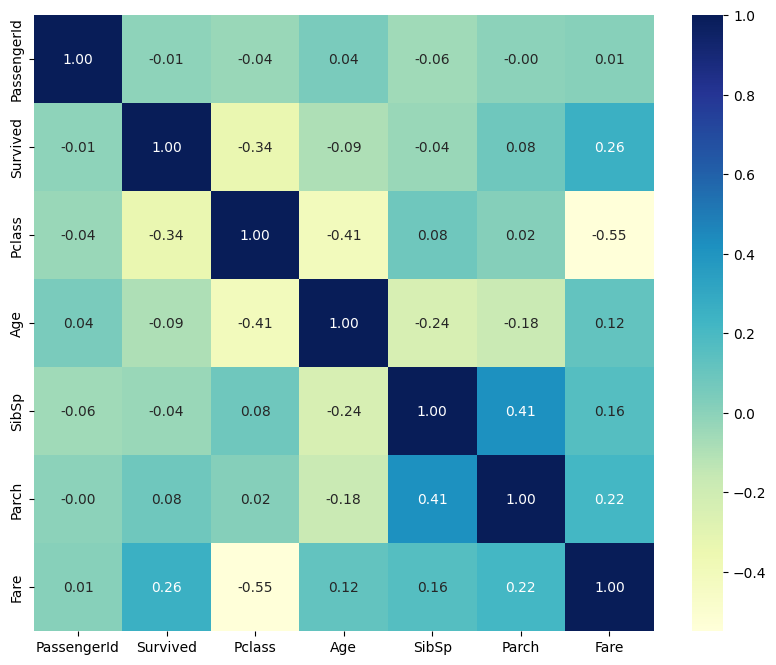

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.select_dtypes(include=np.number).corr(), cmap="YlGnBu", annot=True, fmt=".2f")
plt.show()


Gráficos - Treino:


<Figure size 640x480 with 0 Axes>

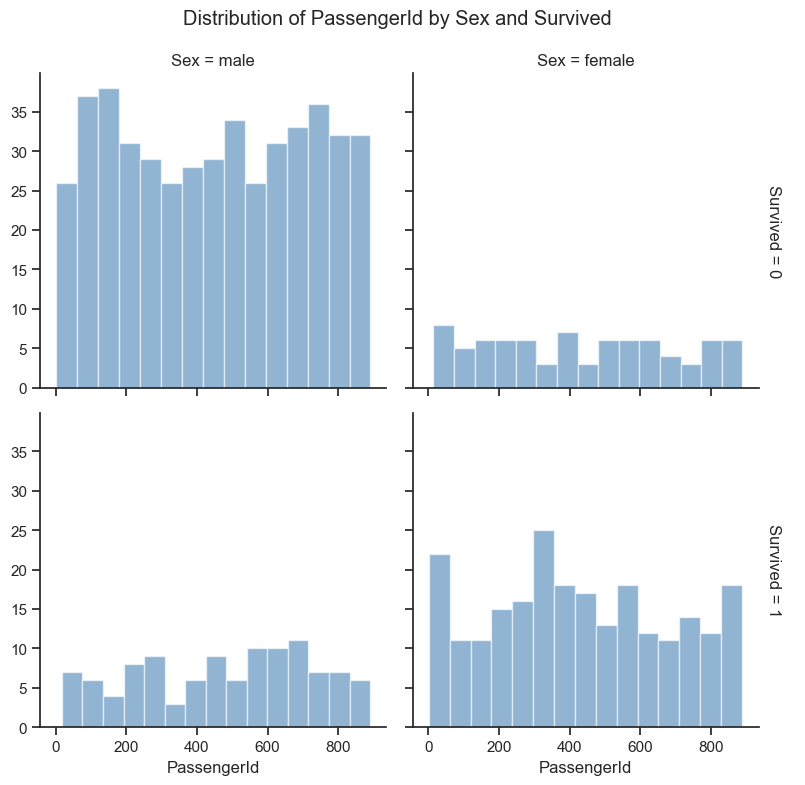

<Figure size 640x480 with 0 Axes>

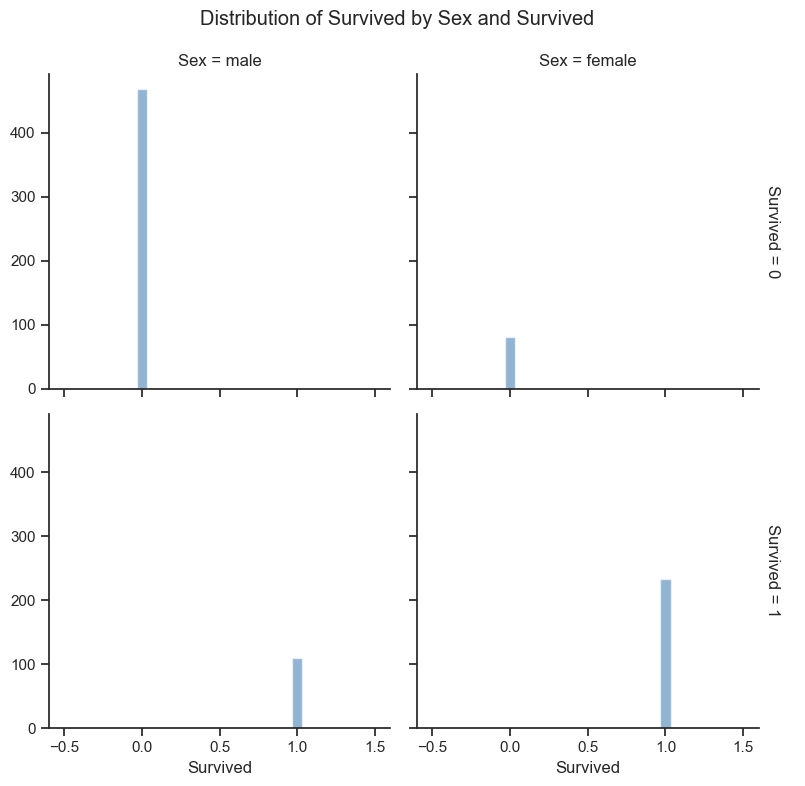

<Figure size 640x480 with 0 Axes>

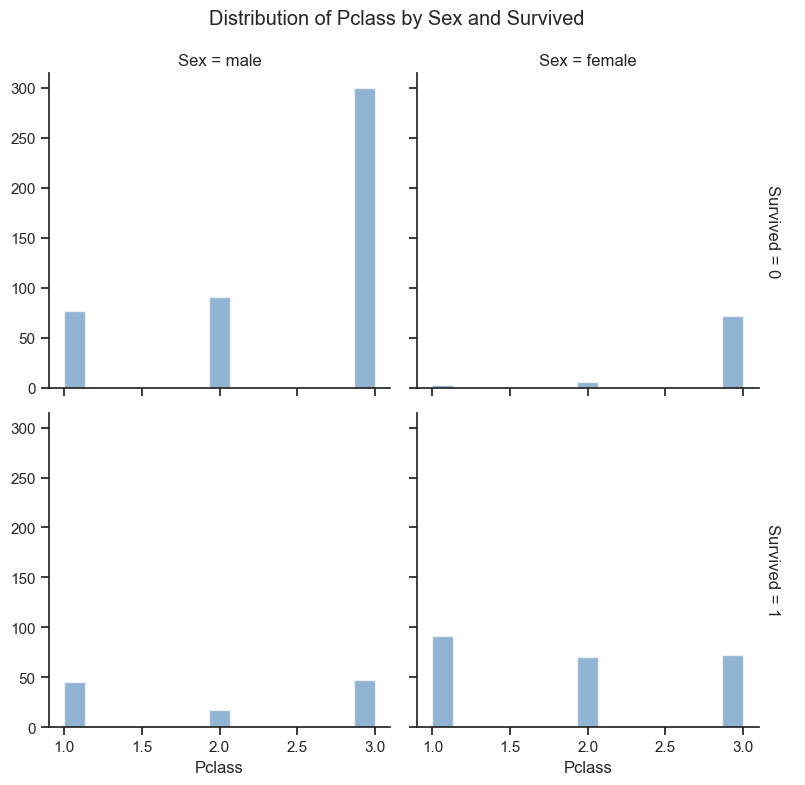

<Figure size 640x480 with 0 Axes>

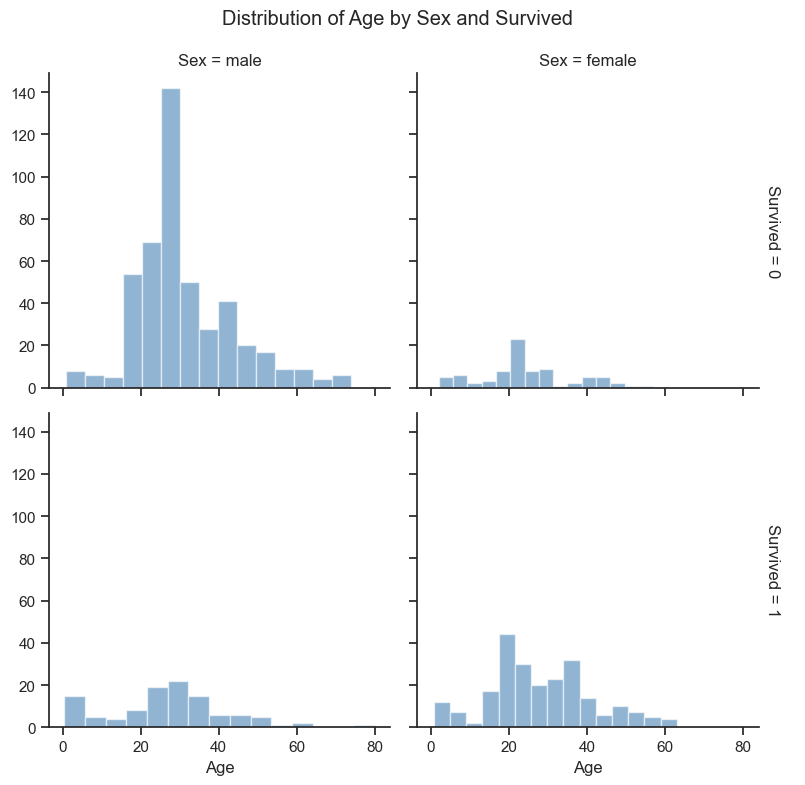

<Figure size 640x480 with 0 Axes>

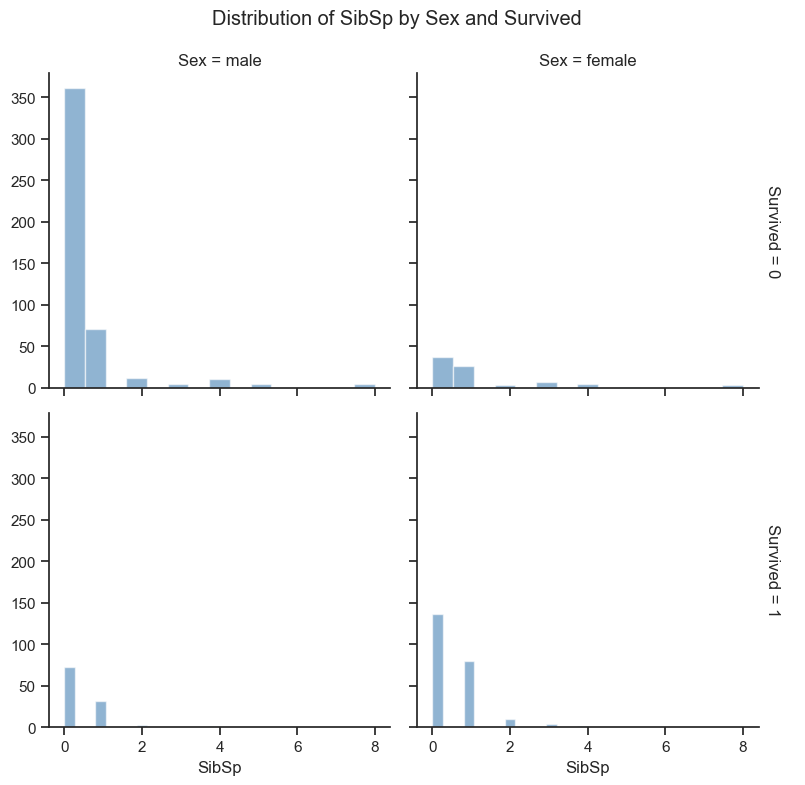

<Figure size 640x480 with 0 Axes>

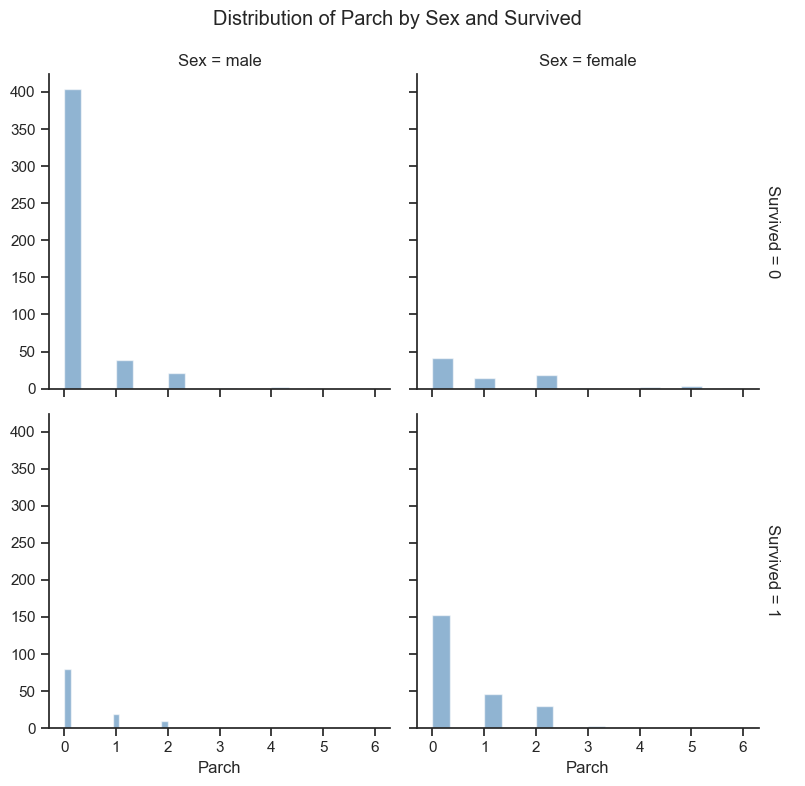

<Figure size 640x480 with 0 Axes>

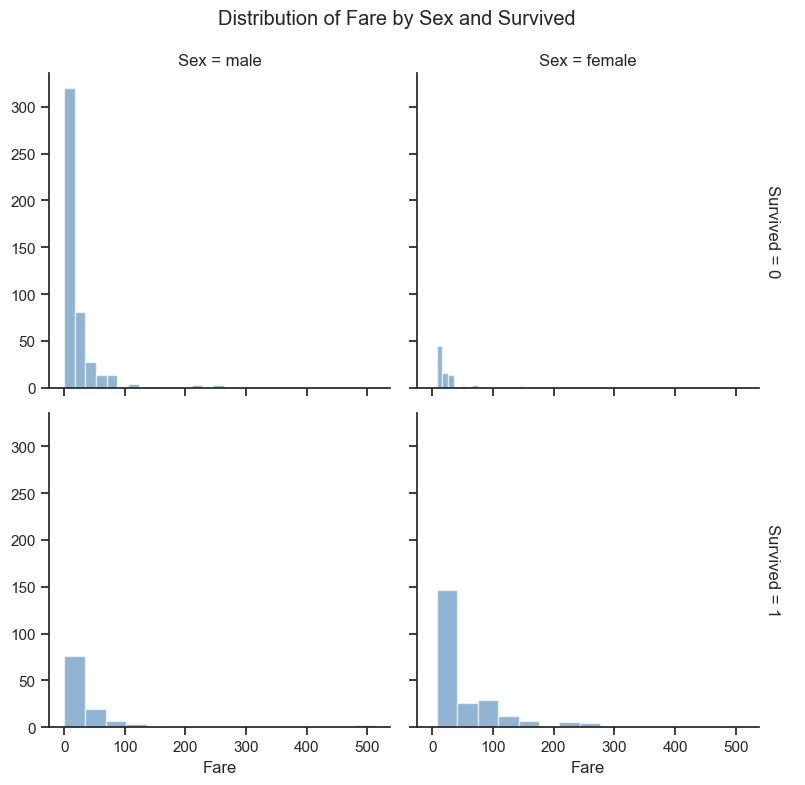

In [12]:
def criar_graficos(df):
    # Configurando o ambiente de plotagem
    sns.set(style="ticks")
    
    # Selecionar variáveis numéricas
    num_vars = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Configurar o número de gráficos e sua disposição
    n_vars = len(num_vars)
    n_cols = 4
    n_rows = (n_vars + n_cols - 1) // n_cols  # Calcula o número necessário de linhas de gráficos
    
    # Criar um FacetGrid para plotar histogramas separados por 'Sex' e 'Survived'
    for var in num_vars:
        plt.figure(figsize=(6.4, 4.8))
        g = sns.FacetGrid(df, col="Sex", row="Survived", height=4, aspect=1, margin_titles=True)
        g.map(plt.hist, var, bins=15, color='steelblue', alpha=0.6)
        plt.subplots_adjust(top=0.9)
        g.fig.suptitle(f'Distribution of {var} by Sex and Survived')
        g.add_legend()
    plt.show()

# Testando a função com dados de treino
print("\nGráficos - Treino:")
criar_graficos(train_data)

## Gradient Boosting Classifier

Classificação Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       105
           1       0.86      0.80      0.83        74

    accuracy                           0.86       179
   macro avg       0.86      0.85      0.85       179
weighted avg       0.86      0.86      0.86       179

Acurácia: 0.8603351955307262
Log Loss: 5.034029802949323
ROC-AUC Score: 0.898970398970399


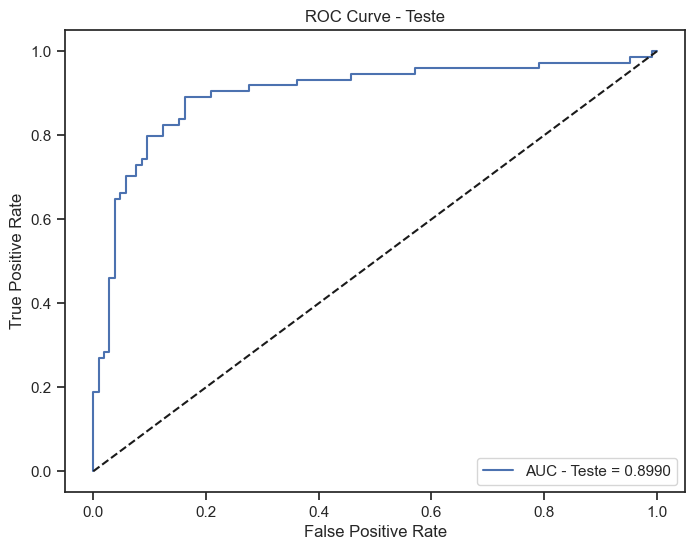

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, log_loss
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Preparar características e alvo
X = train_data.drop(['Survived'], axis=1)
y = train_data['Survived']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


# Definindo as colunas numéricas e categóricas
numeric_features = ['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Pclass', 'Title', 'Sex', 'Embarked']

# Criando o transformador para as variáveis numéricas e categóricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combinando os transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Criando o pipeline com o preprocessador e o modelo
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', GradientBoostingClassifier())])

# Treinando o modelo
pipeline.fit(X_train, y_train)

# Avaliação no conjunto de treino
y_pred_test = pipeline.predict(X_test)
y_pred_proba_test = pipeline.predict_proba(X_test)[:, 1]

# Relatório de classificação e métricas
print("Classificação Report:")
print(classification_report(y_test, y_pred_test))
print("Acurácia:", accuracy_score(y_test, y_pred_test))
print("Log Loss:", log_loss(y_test, y_pred_test))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_test))

# Plot da Curva ROC
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba_test)
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'AUC - Teste = {roc_auc_score(y_test, y_pred_proba_test):.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Teste')
plt.legend(loc='lower right')
plt.show()

In [31]:
age_mean = test_data.groupby(['Pclass', 'Sex'])['Age'].transform('mean')

# Preencher os valores ausentes na coluna 'Age' para o conjunto de dados de treino e teste
test_data['Age'] = test_data['Age'].fillna(age_mean)

In [47]:
if 'Title' not in test_data:
    test_data['Title'] = test_data['Name'].apply(extract_title)


if test_data['Age'].isnull().any():
    age_mean = train_data.groupby(['Pclass', 'Sex'])['Age'].transform('mean')
    test_data['Age'].fillna(age_mean, inplace=True)


test_data_predictions = pipeline.predict(test_data)

test_data['Survived'] = test_data_predictions

print(test_data[['PassengerId', 'Survived']].head())

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0


Resultado final

In [50]:
test_data[['PassengerId', 'Survived']]

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': test_data.Survived})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")